In [4]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('TaxiFare.csv')
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [6]:
import os
from math import radians,cos,sin,asin,sqrt

In [7]:
data = data.drop(['unique_id'], axis = 1)
data.shape

(50000, 7)

In [8]:
data.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [9]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])

In [10]:
data['date_time_of_pickup'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [11]:
data['date'] = data['date_time_of_pickup'].dt.date
data['hour'] = data['date_time_of_pickup'].dt.hour
data['day'] = data['date_time_of_pickup'].dt.day
data['month'] = data['date_time_of_pickup'].dt.month
data['year'] = data['date_time_of_pickup'].dt.year
data['time'] = data['date_time_of_pickup'].dt.time

In [12]:
data.dtypes


amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
date                                 object
hour                                  int64
day                                   int64
month                                 int64
year                                  int64
time                                 object
dtype: object

In [13]:
data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'date', 'hour', 'day', 'month', 'year', 'time'],
      dtype='object')

In [14]:
data = data.drop(['date_time_of_pickup','date','time'], axis = 1)
data.head(2)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010


In [15]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [16]:
data['travel_dist_km'] = distance_transform(data['longitude_of_pickup'].to_numpy(),
                                                data['latitude_of_pickup'].to_numpy(),
                                                data['longitude_of_dropoff'].to_numpy(),
                                                data['latitude_of_dropoff'].to_numpy()
                                              )
data['travel_dist_km']

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: travel_dist_km, Length: 50000, dtype: float64

In [17]:
data

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,6,2013,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,6,2015,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,1,2011,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,11,2012,0.665245


In [18]:
data.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
day                     0
month                   0
year                    0
travel_dist_km          0
dtype: int64

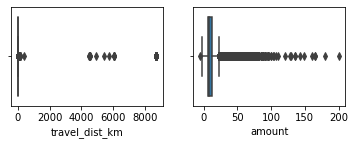

In [19]:
plt.subplot(2,2,1)
sns.boxplot(data['travel_dist_km'])
plt.subplot(2,2,2)
sns.boxplot(data['amount'])

In [20]:
data = data[(data['amount']<25)& (data['travel_dist_km']<4000)]

In [21]:
data.shape

(46269, 11)

In [22]:
data

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,6,2013,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,6,2015,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,1,2011,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,11,2012,0.665245


In [23]:
a = data['hour'].value_counts()
x = pd.DataFrame(a).sort_index(axis = 0)
b = [i for i in range(0,25)]
y = pd.DataFrame(b)

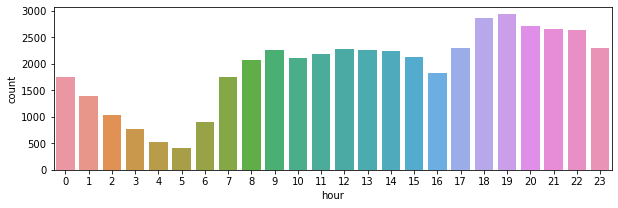

In [24]:
plt.rcParams['figure.figsize'] = [10,3]
sns.countplot(x = 'hour', data = data)

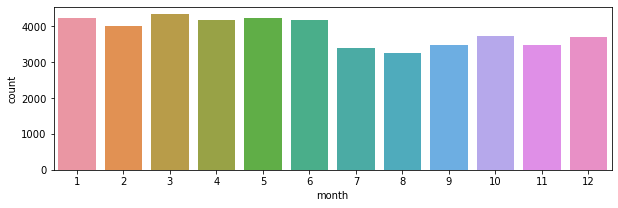

In [25]:
sns.countplot(x = 'month', data = data)

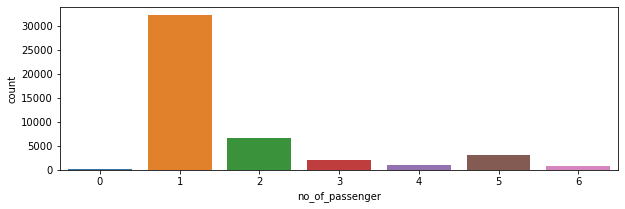

In [26]:
sns.countplot(x = 'no_of_passenger', data = data)

In [27]:
data['travel_dist_km']

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: travel_dist_km, Length: 46269, dtype: float64

# training the data

In [28]:
data.head(2)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,8.450134


In [29]:
x = data.drop(['amount'], axis = 1)
y = pd.DataFrame(data['amount'])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state = 1)


In [31]:
def shape(x_train,x_test,y_train,y_test):
    print('x_train shape :', x_train.shape)
    print('x_test shape :', x_test.shape)
    print('y_train shape : ', y_train.shape)
    print('y_test shape :', y_test.shape)

In [32]:
shape(x_train,x_test,y_train,y_test)

x_train shape : (32388, 10)
x_test shape : (13881, 10)
y_train shape :  (32388, 1)
y_test shape : (13881, 1)


In [33]:
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators= 100, random_state=1)
random_forest_model1 = mdl.fit(x_train,y_train)

In [34]:
y_predict = mdl.predict(x_test)

In [35]:
from sklearn import metrics

In [36]:
r2score = metrics.r2_score(y_test,y_predict)
r2score


0.743170762958326

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
import math
MAE = metrics.mean_absolute_error(y_test, y_predict)
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)

In [39]:
def matrices_scores(model):
    print('r2score :' ,metrics.r2_score(y_test,y_predict))
    print('MAE :', metrics.mean_absolute_error(y_test, y_predict))
    print('MSE :', metrics.mean_squared_error(y_test, y_predict))
    print('RMSE :', math.sqrt(MSE))
    

In [40]:
matrices_scores(random_forest_model1)

r2score : 0.743170762958326
MAE : 1.53684641030391
MSE : 5.034079490192382
RMSE : 2.243675442258167


In [41]:
model_1 = pd.DataFrame({'models ': ['random_forest_model1'],
                      'r2score': [r2score],
                      'MAE ': [MAE],
                      'MSE': [MSE],
                      'RMSE': [RMSE]})

In [42]:
model_1

,models,r2score,MAE,MSE,RMSE
0,random_forest_model1,0.743171,1.536846,5.034079,2.243675


# random forest with grid search

In [43]:
tuned_parameters = [{'n_estimators': [85,100],
                    'min_samples_split': [ 15,20],
                    'max_depth': [8,10]}]

In [44]:
random_forest_model2 = RandomForestRegressor(random_state=1)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(estimator = random_forest_model2,
                   param_grid = tuned_parameters,
                   cv = 10)

In [47]:
grid

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
             param_grid=[{'max_depth': [8, 10], 'min_samples_split': [15, 20],
                          'n_estimators': [85, 100]}])

In [48]:
grid_parameters_select = grid.fit(x_train,y_train)

In [49]:
grid_parameters_select.best_params_

{'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 100}

In [50]:
from sklearn.ensemble import RandomForestRegressor
grid_mdl = RandomForestRegressor(n_estimators= 100,max_depth =  10, min_samples_split =  20, random_state=1)
grid_mdl = grid_mdl.fit(x_train,y_train)

In [51]:
y_predict = grid_mdl.predict(x_test)

In [52]:
matrices_scores(grid_mdl)
    

r2score : 0.7436599073346131
MAE : 1.5460548800255223
MSE : 5.0244918291426774
RMSE : 2.243675442258167


In [53]:
import math
MAE = metrics.mean_absolute_error(y_test, y_predict)
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)

In [54]:
metrics.r2_score(y_test,y_predict)

0.7436599073346131

In [55]:
model_2 = pd.DataFrame({'models ': ['grid_mdl'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [56]:
model_2

,models,r2score,MAE,MSE,RMSE
0,grid_mdl,0.74366,1.546055,5.024492,2.241538


In [57]:
model_1

,models,r2score,MAE,MSE,RMSE
0,random_forest_model1,0.743171,1.536846,5.034079,2.243675


In [58]:
model_1 = model_1.append(model_2)

In [59]:
model_1

,models,r2score,MAE,MSE,RMSE
0,random_forest_model1,0.743171,1.536846,5.034079,2.243675
0,grid_mdl,0.743660,1.546055,5.024492,2.241538


# LINEAR REGRESSION

In [60]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [61]:
linear_model = linear_model.fit(x_train,y_train)

In [62]:
y_predict = linear_model.predict(x_test)

In [63]:
matrices_scores(linear_model)

r2score : 0.3149312609896454
MAE : 2.4679513138905698
MSE : 13.427951303941253
RMSE : 2.2415378268373427


In [64]:
model_3 = pd.DataFrame({'models ': ['linear_model'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [65]:
model_1 = model_1.append(model_3)
model_1

,models,r2score,MAE,MSE,RMSE
0,random_forest_model1,0.743171,1.536846,5.034079,2.243675
0,grid_mdl,0.743660,1.546055,5.024492,2.241538
0,linear_model,0.314931,2.467951,13.427951,2.241538


# DESCION TREE REGRESSIOR

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
descion_tree = DecisionTreeRegressor(criterion='mse',max_depth= 5,max_leaf_nodes=15)
descion_tree = descion_tree.fit(x_train,y_train)


In [68]:
y_predict = descion_tree.predict(x_test)

In [70]:
matrices_scores(descion_tree)

r2score : 0.697585944251534
MAE : 1.7355164156838085
MSE : 5.927582128596293
RMSE : 2.2415378268373427


In [77]:
from sklearn.tree import plot_tree

In [80]:
from sklearn import tree

In [81]:
labels = x_train.columns

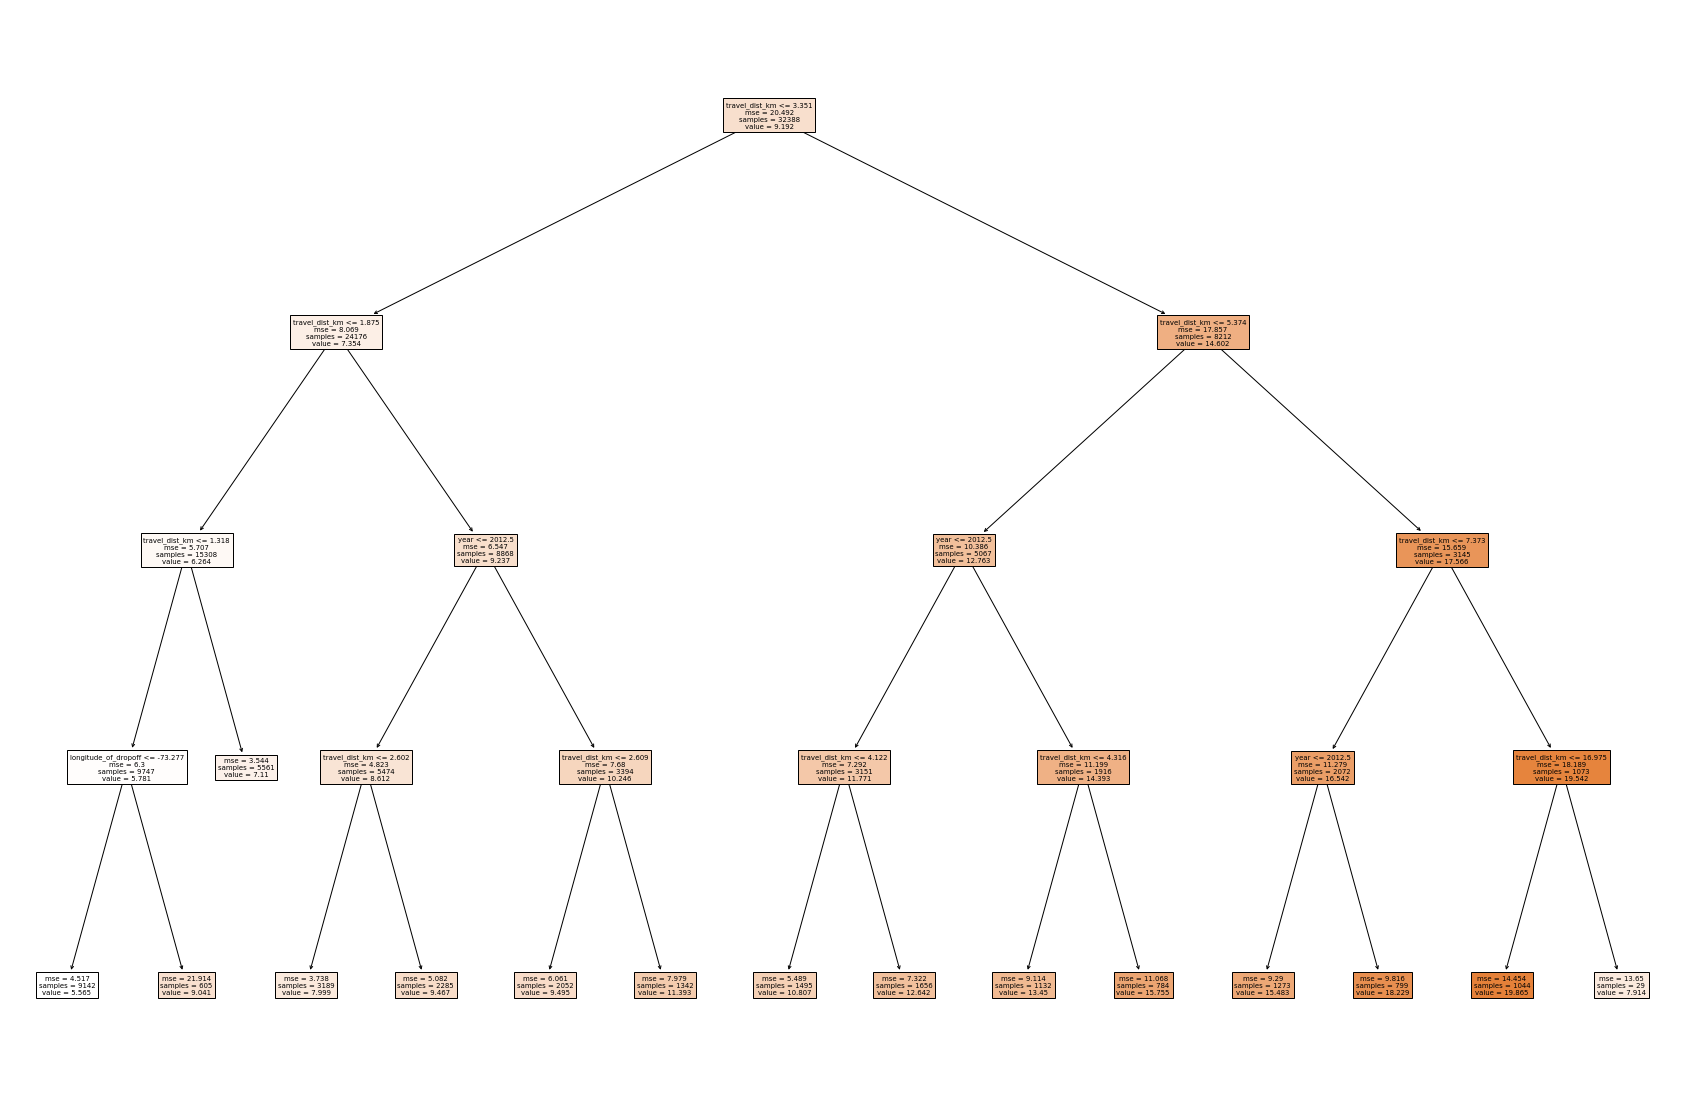

In [88]:
plt.figure(figsize = (30,20))
tree.plot_tree(descion_tree, feature_names = labels, filled =True)
plt.show()

In [85]:
model_4 = pd.DataFrame({'models ': ['descion_tree'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [ ]:
model_1 = model_1.append(model_4)
model_1

# BAGGING MODEL

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagging_model = BaggingRegressor(LinearRegression())
baging_model = bagging_model.fit(x_train,y_train)

In [ ]:
y_predict = baging_model.predict(x_test)

In [ ]:
matrices_scores(baging_model)

In [ ]:
model_5 = pd.DataFrame({'models ': ['baging_model'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [ ]:
model_1 = model_1.append(model_5)
model_1

# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost  = AdaBoostRegressor()
adaboost = adaboost.fit(x_train,y_train)

In [ ]:
y_predict = adaboost.predict(x_test)

In [ ]:
matrices_scores(adaboost)

In [ ]:
model_6 = pd.DataFrame({'models ': ['adaboost'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [ ]:
model_1

In [ ]:
model_1 = model_1.append(model_6)
model_1

# XGBOOST

In [ ]:
from xgboost.sklearn import XGBRegressor
XGBmodel = XGBRegressor()

In [ ]:
XGBmodel = XGBmodel.fit(x_train,y_train)

In [ ]:
y_predict = XGBmodel.predict(x_test)

In [ ]:
matrices_scores(XGBmodel)

In [ ]:
model_7 = pd.DataFrame({'models ': ['XGBmodel'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [ ]:
model_1 = model_1.append(model_7)

In [ ]:
model_1

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model = knn_model.fit(x_train,y_train)

In [ ]:
y_predict = knn_model.predict(x_test)

In [ ]:
matrices_scores(knn_model)

In [ ]:
model_8 = pd.DataFrame({'models ': ['knn_model'],
                      'r2score': [metrics.r2_score(y_test,y_predict)],
                      'MAE ': [metrics.mean_absolute_error(y_test, y_predict)],
                      'MSE': [metrics.mean_squared_error(y_test, y_predict)],
                      'RMSE': [ math.sqrt(MSE)]})

In [ ]:
model_1 = model_1.append(model_8)

In [ ]:
model_1

In [ ]:
from sklearn.multiclass import OneVsOneClassifier